In [1]:
import zipfile

import numpy as np
import pandas as pd
import os
import cv2

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import joblib

In [2]:
with zipfile.ZipFile('train.zip', 'r') as zip_ref:
    zip_ref.extractall()
path = 'train'

In [3]:
X = []
y = []
for filename in os.listdir(path):
    imgPath = os.path.join(path, filename)
    img = cv2.imread(imgPath)
    img = cv2.resize(img, (100,100))
    label = filename.split('.')[0]
    X.append(img)
    y.append(label)

In [4]:
print(len(X))
print(len(y))

1208
1208


In [5]:
X = np.array(X)
y = np.array(y)
X = X.reshape(len(X), -1)

In [6]:
pd.Series(y).value_counts()

cat    604
dog    604
Name: count, dtype: int64

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train/255
X_test = X_test/255

In [8]:
model = SVC(kernel='rbf')
model.fit(X_train, y_train)

SVC()

In [9]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.6033057851239669


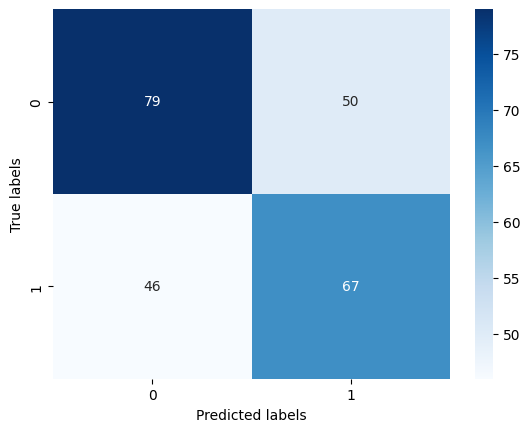

In [10]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

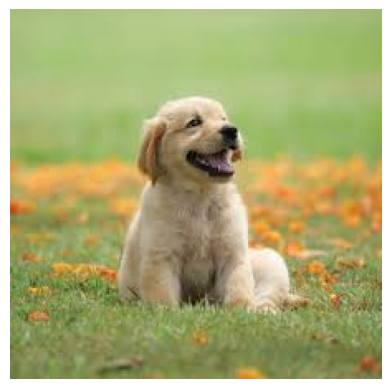

Predicted label: dog


In [11]:
def predict_image(image_path, model):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (100, 100))
    img = img.reshape(1, -1) / 255
    prediction = model.predict(img)
    return prediction[0]

# Example usage: input an image path and get the prediction
image_path = 'dog.jpg'  # Replace with the path to your image
prediction = predict_image(image_path, model)
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for Matplotlib
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()
print("Predicted label:", prediction)